In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import os


In [4]:
train_dir = "/content/drive/MyDrive/Dataset/train"
val_dir   = "/content/drive/MyDrive/Dataset/val" 

test_dir  = "/content/drive/MyDrive/Dataset/test"

In [5]:
import numpy as np

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.python.keras.preprocessing import image

In [6]:
pre_model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 3s 0us/step


In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
batch_size=32



train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1)

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224), 
        batch_size=batch_size, 
        class_mode="categorical")

Found 3651 images belonging to 2 classes.


In [10]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode="categorical")

Found 999 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=1,
        class_mode="categorical",
        shuffle=False)

Found 20 images belonging to 2 classes.


In [12]:
import keras

In [13]:
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)


for layer in base_model.layers:
  layer.trainable = False  
  
final_model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)

58892288/58889256 [==============================] - 0s 0us/step


In [14]:
final_model.compile(loss ="categorical_crossentropy", 
                    optimizer = "adam", 
                    metrics=["accuracy"])

In [15]:
fit_history = final_model.fit_generator(
        train_generator, 
        steps_per_epoch=len(train_generator),
        epochs=50,
        validation_data=val_generator, 
        validation_steps=len(val_generator))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
115/115 [==============================] - 1004s 9s/step - loss: 0.5111 - accuracy: 0.7816 - val_loss: 0.5762 - val_accuracy: 0.7828
Epoch 2/50
115/115 [==============================] - 43s 372ms/step - loss: 0.3021 - accuracy: 0.8693 - val_loss: 0.4200 - val_accuracy: 0.7828
Epoch 3/50
115/115 [==============================] - 42s 367ms/step - loss: 0.3182 - accuracy: 0.8737 - val_loss: 0.3130 - val_accuracy: 0.8619
Epoch 4/50
115/115 [==============================] - 42s 366ms/step - loss: 0.2680 - accuracy: 0.8955 - val_loss: 0.2783 - val_accuracy: 0.8949
Epoch 5/50
115/115 [==============================] - 42s 368ms/step - loss: 0.3030 - accuracy: 0.8733 - val_loss: 0.2555 - val_accuracy: 0.8949
Epoch 6/50
115/115 [==============================] - 42s 365ms/step - loss: 0.2865 - accuracy: 0.8776 - val_loss: 0.2408 - val_accuracy: 0.9029
Epoch 7/50
115/115 [==============================] - 42s 364ms/step - loss: 0.2908 - accuracy: 0.8719 - val_loss: 0.6122 - val_acc

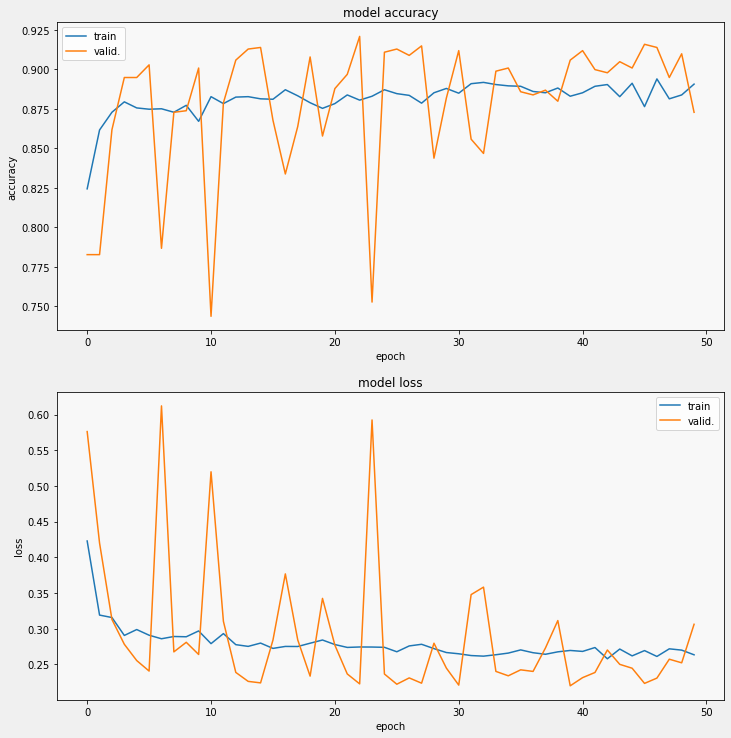

In [16]:
display_training_curves(fit_history.history['accuracy'], fit_history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(fit_history.history['loss'], fit_history.history['val_loss'], 'loss', 212)

In [17]:
result  = final_model.evaluate_generator(test_generator,steps=len(test_generator))
print('Loss:', result[0])
print('Accuracy:', result[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss: 0.354000985622406
Accuracy: 0.8500000238418579


In [18]:
train_generator.class_indices

{'normal': 0, 'tumor': 1}

In [19]:
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = final_model.predict_generator(test_generator,steps = nb_samples).argmax(axis=-1)

predict

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [20]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

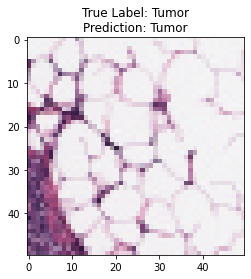

In [57]:
filename = "/content/drive/MyDrive/Dataset/val/tumor/8863_idx5_x1801_y1201_class1.png" 

img = image.load_img(filename, 
                     target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = final_model.predict(x)

predicton="Normal" if y.argmax(axis=-1)==0 else "Tumor"
actual="Normal" if "NORMAL" in filename else "Tumor" 

img=mpimg.imread(filename)
title_text = ("%s%s%s%s%s"%("True Label: ", actual, "\n", "Prediction: ", predicton))
plt.title(title_text)
imgplot=plt.imshow(img)

In [58]:
import tensorflow as tf

from keras.models import load_model

final_model.save('BreastTumorTest.h5')